In [0]:
import numpy as np
import matplotlib.pyplot as plt

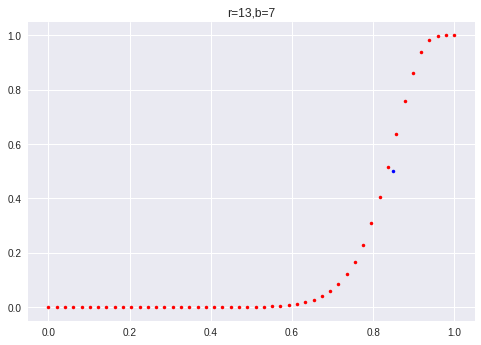

.


In [43]:
# Problem 1:
rbvals = [(1,1),(2,2),(5,5),(1,5),(5,1),(5,20)]
rbvals04 = [(5,60),(3,10)] # vals for r and b that give max slope at x=0.4
rbvals085 = [(13,7),(25,60)]
'''
Experiment with different values of r and b to determine a pair of (not too 
large) positive integers r and b so that the function f (x) has the maximum 
slope around x = 0.4.
'''

r,b=rbvals04[0]
r,b=rbvals085[0]
x = np.linspace(0,1); f = 1-(1-x**r)**b; 
# max slope at x=0.4 for r=5, b=60 or r=3, b=10
plt.title('r=%d,b=%d' % (r,b)); plt.plot(x,f,'r.',0.85,0.5,'b.'); plt.show() 

'''
Plot the function f (x) = 1−(1−x r ) b for 
(r, b) ∈ {(1, 1), (2, 2), (5, 5), (1, 5), (5, 1), (5, 20)} and x ∈ [0, 1]. 
Plot the six functions obtained for the different values of r and b as subplots 
of the same figure.
'''

print('.')
# for val in rbvals:
#     r,b=val
#     f = 1-(1-x**r)**b  
#     plt.title("r=%d,b=%d"% (r, b))
#     plt.plot(x,f); plt.show()

In [0]:
# Problem 2

'''
N = 10**9   Total number of people
D = 1000    Duration of observation
H = 10**5   Number of hotels
P = 0.01    Probability person i will stay at a hotel
'''

# Part a)

N = 10**9   
D = 2000   
H = 10**5   
P = 0.01    

# nmbr of Evil events = pairs of people * pairs of days * prob of Evil event
nEvil = N**2/2 * D**2/2 * (P**2/H)**2

print(nEvil) # 1 mil ppl

# Part b)

N = 2*10**9   
D = 1000   
H = 2*10**5   
P = 0.01    

# nmbr of Evil events = pairs of people * pairs of days * prob of Evil event
nEvil = N**2/2 * D**2/2 * (P**2/H)**2

print(nEvil) # 250,000 ppl

# Part c)

N = 10**9   
D = 1000   
H = 10**5   
P = 0.01    

# nmbr of Evil events = pairs of people * pairs of days * prob of Evil event
nEvil = N**2/2 * D**2/2 * (P**3/H)**2

print(nEvil) # 25 ppl

1000000.0
250000.0
25.000000000000004


# Problem 3

## Part a

MapReduce for finding max integer ($n_i$) of a set of integers N:

### Map 1: 
Hash the integers into $g$ buckets of size $\frac{N}{g}$ integers, find max in each bucket. Group buckets into k groups of size $\frac{g}{k}$ buckets. Output the value of the max integer with key = group id of each bucket

#### Input: N

#### Output: (d, max n in $j^{th}$ bucket) where $d\in\mathbb{Z}$, d $\in[1,k] $ and $j \in \mathbb{Z}$, j $\in[1,g]$

### Reduce 1:
Group results by group of buckets (d) per reducer, find max in that group of buckets and output it

#### Input: 

(1, (max n in $bucket_{1,1}$, max n in $bucket_{1,2}$, ... , max n in $bucket_{1,j}$, ... , max n in $bucket_{1,g/k}$)) group 1

(2, (max n in $bucket_{2,1}$, max n in $bucket_{2,2}$, ... , max n in $bucket_{2,j}$, ... , max n in $bucket_{2,g/k}$)) group 2

...

(d, (max n in $bucket_{d,1}$, max n in $bucket_{d,2}$, ... , max n in $bucket_{d,j}$, ... , max n in $bucket_{d,g/k}$)) group d

...

(k, (max n in $bucket_{k,1}$, max n in $bucket_{k,2}$, ... , max n in $bucket_{k,j}$, ... , max n in $bucket_{k,g/k}$)) group k

#### Output:

(1, max in $group_1$)

(2, max in $group_2$)

...

(d, max in $group_d$)

...

(k, max in $group_k$)

### Map 2:

Pool all outputs of Reduce 1, assign same key to all key-value pairs, keep value same. 

#### Input: output of Reduce 1

#### Output: 
(0, max in $group_1$)

(0, max in $group_2$)

...

(0, max in $group_d$)

...

(0, max in $group_k$)

### Reduce 2:
Collect all in one reducer and return max integer

#### Input: 
(0, (max in $group_1$, max in $group_2$, max in $group_3$,...))
#### Output: $n_i$ (max n in N)


## Part b

Similarly to part a, except instead of max value, return a tuple of average value $\bar X_i$ and size of the population $n_i$ that this average was created from.
To combine N averages $\bar X_1$, $\bar X_2$, $\bar X_3$, etc that were calculated for $n_1$, $n_2$, $n_3$... $n_N$ values respectively: 

$$\frac{\bar X_1 \times n_1 + \bar X_2 \times n_2 + ... + \bar X_N \times n_N}{n_1 + n_2 + ... + n_N}$$

## Part c

### Map: 

#### Input: 
Multiset of N integers

#### Output:
key-value pairs: $(n_i, n_i)$ - same key and value 

### Reduce:
Collect non distinct integers per reducer and discard all but one instances.

#### Input:
$(n_i, (n_i, n_i, n_i, ...))$

#### Output:
$n_i$

## Part d

### Map 1:

#### Input: 
Multiset of N integers

#### Output:
key-value pairs: $(n_i, 1)$ 

### Reduce 1:
Collect by integer keys per reducer and discard all but one values.

#### Input:
$(n_i, (1, 1, 1, ...))$

#### Output:
$(n_i, 1)$

### Map 2:

#### Input: 
Set $S \subseteq N$ of distinct integers .

#### Output:
key-value pairs: $(1, n_i)$ 

### Reduce 2:

Collect all words and return size of the value tuple:

#### Input:
$(1, (n_1, n_2, ... n_S))$

#### Output:
$|S|$

If reducer size is not large enough - can partition words into buckets similar to part a.

In [0]:
%%shell 
apt-get install openjdk-8-jdk-headless -qq > /dev/null
rm -f spark*.tgz*
wget -q https://www-eu.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
tar xf spark-2.4.0-bin-hadoop2.7.tgz
pip install -q findspark

In [0]:
%%shell
# WARNING!: some rm -f below, read before running
rm -f ml-latest-small.zip
rm -rf ml-latest-small
rm -f links.csv tags.csv ratings.csv README.txt movies.csv
wget -q http://files.grouplens.org/datasets/movielens/ml-latest-small.zip -O ml-latest-small.zip
unzip -j ml-latest-small.zip
rm -f ml-latest-small.zip
ls -l

Archive:  ml-latest-small.zip
  inflating: links.csv               
  inflating: tags.csv                
  inflating: ratings.csv             
  inflating: README.txt              
  inflating: movies.csv              
total 225804
-rw-r--r--  1 root root    197979 Sep 26 20:50 links.csv
-rw-r--r--  1 root root    494431 Sep 26 20:49 movies.csv
-rw-r--r--  1 root root   2483723 Sep 26 20:49 ratings.csv
-rw-r--r--  1 root root      8342 Sep 26 20:50 README.txt
drwxr-xr-x  1 root root      4096 Feb 14 17:23 sample_data
drwxr-xr-x 13 1000 1000      4096 Oct 29 06:36 spark-2.4.0-bin-hadoop2.7
-rw-r--r--  1 root root 227893062 Oct 29 07:10 spark-2.4.0-bin-hadoop2.7.tgz
-rw-r--r--  1 root root    118660 Sep 26 20:49 tags.csv


In [0]:
# SET PATHS
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

# INITIALIZE FINDSPARK
import findspark
findspark.init()

# CREATE CONTEXT
import pyspark
sc = pyspark.SparkContext(appName="hw1")


In [0]:
# Problem 4

links = sc.textFile("links.csv")
tags = sc.textFile("tags.csv")
ratings = sc.textFile("ratings.csv")
movies = sc.textFile("movies.csv")
files = {"links":links, "tags":tags, "ratings":ratings, "movies":movies}

def remove_header(itr_index, itr):
    return iter(list(itr)[1:]) if itr_index == 0 else itr

def clean_commas(item):
#     item = item.strip().lower().split(', ')
    if '"' in item:
        item = item.split('"')
        item[1]=item[1].replace(',','')
        item=''.join(item)
    return item


def clean(entry):
    return entry.strip().lower().split(',')

  
for filename in files:
    print(files[filename].take(50))
    files[filename] = files[filename].mapPartitionsWithIndex(remove_header)
    print(files[filename].take(50),"\n")


['movieId,imdbId,tmdbId', '1,0114709,862', '2,0113497,8844', '3,0113228,15602', '4,0114885,31357', '5,0113041,11862', '6,0113277,949', '7,0114319,11860', '8,0112302,45325', '9,0114576,9091', '10,0113189,710', '11,0112346,9087', '12,0112896,12110', '13,0112453,21032', '14,0113987,10858', '15,0112760,1408', '16,0112641,524', '17,0114388,4584', '18,0113101,5', '19,0112281,9273', '20,0113845,11517', '21,0113161,8012', '22,0112722,1710', '23,0112401,9691', '24,0114168,12665', '25,0113627,451', '26,0114057,16420', '27,0114011,9263', '28,0114117,17015', '29,0112682,902', '30,0115012,37557', '31,0112792,9909', '32,0114746,63', '34,0112431,9598', '36,0112818,687', '38,0113442,33689', '39,0112697,9603', '40,0112749,34615', '41,0114279,31174', '42,0112819,11443', '43,0114272,35196', '44,0113855,9312', '45,0114681,577', '46,0113347,11861', '47,0114369,807', '48,0114148,10530', '49,0114916,8391', '50,0114814,629', '52,0113819,11448', '53,0110299,49133']
['1,0114709,862', '2,0113497,8844', '3,011322

In [0]:
# 1
def avg_num_of_ratings_per_movie(rdd):
    rdd = rdd.map(clean).map(lambda entry: (entry[1],1)).reduceByKey(lambda x,y: x+y)
    n = rdd.count()
    rdd = rdd.map(lambda entry: (1,entry[1])).reduceByKey(lambda x,y: x+y)
    return rdd.first()[1]/n

# 2
def avg_rating_per_genre(genreRdd, ratingRdd):
    rddG = genreRdd.map(clean_commas).map(clean).flatMap(lambda entry: [(entry[0],genre) for genre in entry[2].split('|')])
    rddR = ratingRdd.map(clean).map(lambda entry: (entry[1],entry[2]))
    temp_rddR = rddR.map(lambda entry: (entry[0],1)).reduceByKey(lambda x,y: x+y)
    temp_rdd = temp_rddR.join(rddG).map(lambda entry: (entry[1][1],entry[1][0])).reduceByKey(lambda x,y: x+y)
    rdd = rddR.join(rddG).map(lambda entry: (entry[1][1],float(entry[1][0]))).reduceByKey(lambda x,y: x+y)
    rdd = rdd.join(temp_rdd).map(lambda entry: (entry[0],entry[1][0]/entry[1][1]))
    return rdd.collect()

# 3
def top_three_movies_per_genre(genreRdd, ratingRdd):
    rddG = genreRdd.map(clean_commas).map(clean).flatMap(lambda entry: [(entry[0], (entry[1],genre)) for genre in entry[2].split('|')]) # rddG:      (film_id, (title, genre))
    rddR = ratingRdd.map(clean).map(lambda entry: (entry[1],float(entry[2])))                                                           # rddR:      (film_id, individual_rat) 
    rddR_nums = rddR.map(lambda entry: (entry[0],1)).reduceByKey(lambda x,y: x+y)                                                       # rddR_nums: (film_id, total_num_of_ratings),
    rddR = rddR_nums.join(rddR.reduceByKey(lambda x,y: x+y)).map(lambda entry: (entry[0],entry[1][1]/entry[1][0]))                      # rddR:      (film_id, avg_rat)
    rdd = rddG.join(rddR).map(lambda x: (x[1][0][1], (x[1][0][0],x[1][1])))                                                             # rdd:       (genre, (title, avg_rat))
    rddG = rddG.map(lambda entry: (entry[1][1],1)).reduceByKey(lambda x,y: x+y)
    top3s=[]
    for genre in rddG.collect():
        top3s.append((genre[0],rdd.filter(lambda x: x[0] == genre[0]).map(lambda entry: entry[1]).takeOrdered(3, key = lambda x: -x[1])))
    return top3s

# 4
def top_ten_users_by_ratings(ratingRdd):
    topten = ratingRdd.map(clean).map(lambda entry: (entry[0],1)).reduceByKey(lambda x,y: x+y).takeOrdered(10, key = lambda x: -x[1])
    return topten

# 5 
def top_ten_pairs_of_users_by_movies(rdd):
    # take (user, all movies watched by this user) and (movie, users who watched this movie) and by joining them generate (user, all users who have watched movies seen by this user)
    # then flatmap that to get pairs of users per matching movie for each user and then reduce by key (user pair in this case) to count how many times each pair appears in the rdd
    # now each user pair will have a matching index associated with it
    # just takeOrdered 10 when in descending order
    users = rdd.map(clean).map(lambda x: x[0]).distinct() # user id's (unique)
    rdd_user_movies = rdd.map(clean).map(lambda entry: (entry[0],entry[1])).groupByKey().mapValues(tuple) #(user, (movies))
    rdd_movie_users = rdd.map(clean).map(lambda entry: (entry[1],entry[0])).groupByKey().mapValues(tuple) #(movie, (users))
    rdd_movie_user = rdd_user_movies.flatMap(lambda entry: [(movie,entry[0]) for movie in entry[1]])      #(movie, user)
    rdd = rdd_movie_user.join(rdd_movie_users).map(lambda entry: entry[1])                                #(movie, user).join(movie, (users)) -> (user,(users))
    rdd = rdd.flatMap(lambda entry: [(tuple(sorted([int(entry[0]),int(user)])),1) for user in entry[1]]).filter(lambda x:x[0][0]!=x[0][1]).reduceByKey(lambda x,y: x+y)
    #(user, (users)) -> ((user1, user2),1) -> ((user1, user2),n)
    topten = rdd.takeOrdered(10, key = lambda x: -x[1])
    return topten

if __name__=="__main__":
#     print(avg_num_of_ratings_per_movie(files["ratings"]))
#     print(avg_rating_per_genre(files["movies"],files["ratings"]))
#     print(top_three_movies_per_genre(files["movies"],files["ratings"]))
#     print(top_ten_users_by_ratings(files["ratings"]))
    print(top_ten_pairs_of_users_by_movies(files["ratings"]))

[((414, 599), 2676), ((414, 474), 2154), ((68, 414), 1900), ((414, 448), 1828), ((274, 414), 1712), ((474, 599), 1674), ((68, 599), 1580), ((448, 599), 1580), ((274, 599), 1566), ((380, 414), 1446)]
